In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zbetron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# sam
# #load data
# wine_data1 = pd.read_csv('/Users/samdisorbo/Documents/code/python_projects/eecs448/wine/archive/winemag-data-130k-v2.csv')
# #Load other wine csv
# wine_data2 = pd.read_csv('/Users/samdisorbo/Documents/code/python_projects/eecs448/wine/archive/winemag-data_first150k.csv')

#zach
#load data
wine_data1 = pd.read_csv('/mnt/c/Users/Owner/OneDrive/Documents/Eecs 448/Project/winemag-data-130k-v2.csv')
#Load other wine csv
wine_data2 = pd.read_csv('/mnt/c/Users/Owner/OneDrive/Documents/Eecs 448/Project/winemag-data_first150k.csv')

#combine the two dataframes
wine_data = pd.concat([wine_data1, wine_data2])
wine_data = wine_data.drop_duplicates(subset='description')

In [35]:
wine_data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [36]:
#get number of unique countries
unique_countries = wine_data['country'].unique()
print("Number of unique countries: ", len(unique_countries))

#get number of unique provinces
unique_provinces = wine_data['province'].unique()
print("Number of unique provinces: ", len(unique_provinces))

#get number of unique wineries
unique_wineries = wine_data['winery'].unique()
print("Number of unique wineries: ", len(unique_wineries))

#get number of unique varieties
unique_varieties = wine_data['variety'].unique()
print("Number of unique varieties: ", len(unique_varieties))

#get number of unique regions
unique_regions = wine_data['region_1'].unique()
print("Number of unique regions: ", len(unique_regions))

#print the region that has the most reviews and the number of reviews
most_reviews = wine_data['region_1'].value_counts().idxmax()
print("Region with the most reviews: ", most_reviews)
print("Number of reviews: ", wine_data['region_1'].value_counts().max())

#get number of unique titles
unique_titles = wine_data['title'].unique()
print("Number of unique titles: ", len(unique_titles))

#get number of unique descriptions
unique_descriptions = wine_data['description'].unique()
print("Number of unique descriptions: ", len(unique_descriptions))

#get range of unique points
max_points = wine_data['points'].max()
min_points = wine_data['points'].min()
print("Minimum points: {},   Maximum points: {}".format(min_points, max_points))

#get range of unique prices
max_price = wine_data['price'].max()
min_price = wine_data['price'].min()
print("Minimum price: ${},   Maximum price: ${}".format(min_price, max_price))

#get number of unique tasters
unique_tasters = wine_data['taster_name'].unique()
print("Number of unique tasters: ", len(unique_tasters))

#print the wine that has the most reviews and the number of reviews
most_reviews = wine_data['title'].value_counts().idxmax()
print("Wine with the most reviews: ", most_reviews)
print("Number of reviews: ", wine_data['title'].value_counts().max())

#print the number of wines with only one review
one_review = wine_data['title'].value_counts().eq(1).sum()
print("Number of wines with only one review: ", one_review)

#print the number of total rows
total_rows = wine_data.shape[0]
print("Total number of rows: ", total_rows)

Number of unique countries:  51
Number of unique provinces:  491
Number of unique wineries:  19174
Number of unique varieties:  757
Number of unique regions:  1331
Region with the most reviews:  Napa Valley
Number of reviews:  6421
Number of unique titles:  118808
Number of unique descriptions:  169430
Minimum points: 80,   Maximum points: 100
Minimum price: $4.0,   Maximum price: $3300.0
Number of unique tasters:  20
Wine with the most reviews:  Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)
Number of reviews:  9
Number of wines with only one review:  117873
Total number of rows:  169430


In [38]:
description_tokenized = wine_data['description'].apply(lambda x: tokenize.word_tokenize(x))
description_tokenized.head(10)

0    [Aromas, include, tropical, fruit, ,, broom, ,...
1    [This, is, ripe, and, fruity, ,, a, wine, that...
2    [Tart, and, snappy, ,, the, flavors, of, lime,...
3    [Pineapple, rind, ,, lemon, pith, and, orange,...
4    [Much, like, the, regular, bottling, from, 201...
5    [Blackberry, and, raspberry, aromas, show, a, ...
6    [Here, 's, a, bright, ,, informal, red, that, ...
7    [This, dry, and, restrained, wine, offers, spi...
8    [Savory, dried, thyme, notes, accent, sunnier,...
9    [This, has, great, depth, of, flavor, with, it...
Name: description, dtype: object

Average number of words per review:  47.408569910877645
Total number of unique words in the corpus:  63971


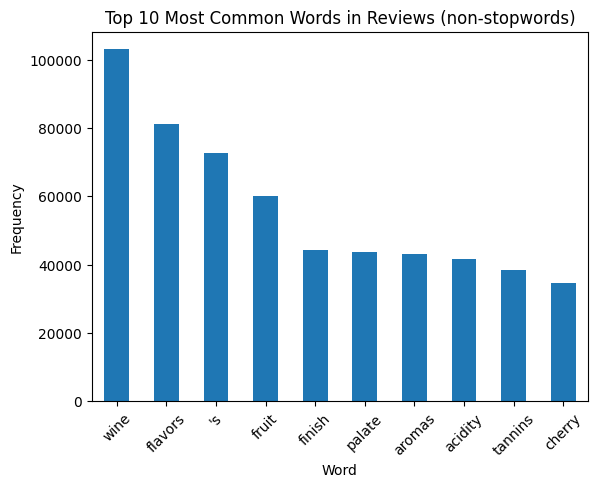

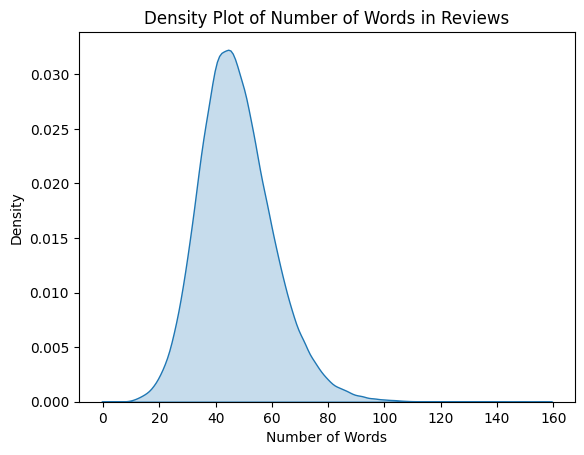

/tmp/ipykernel_337/2595895622.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_taster['description_tokenized'] = description_taster['description'].apply(nltk.word_tokenize)
/tmp/ipykernel_337/2595895622.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_taster['num_words'] = description_taster['description_tokenized'].apply(len)


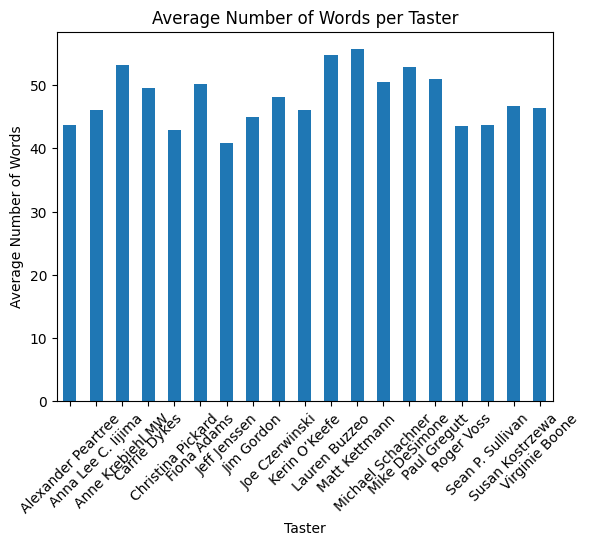

In [39]:
#print the average number of words per review
avg_words = description_tokenized.apply(lambda x: len(x)).mean()
print("Average number of words per review: ", avg_words)

#print the total number of unique words (the dictionary)
flattened_tokens = description_tokenized.explode()
n_words_unique = flattened_tokens.nunique()
print("Total number of unique words in the corpus: ", n_words_unique)

#bar chart of the most frequently-occuring non-stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = flattened_tokens[~flattened_tokens.str.lower().isin(stop_words)]
filtered_tokens = filtered_tokens[filtered_tokens.str.len() > 1]
word_counts = filtered_tokens.value_counts()
word_counts.head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Words in Reviews (non-stopwords)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

#display the number of words in reviews as a histogram/density plot
description_lengths = description_tokenized.apply(len)
sns.kdeplot(data=description_lengths, fill=True)
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.title('Density Plot of Number of Words in Reviews')
plt.show()

#display average number of words per taster
description_taster = wine_data[['description','taster_name']]
description_taster['description_tokenized'] = description_taster['description'].apply(nltk.word_tokenize)
description_taster['num_words'] = description_taster['description_tokenized'].apply(len)
avg_words_per_taster = description_taster.groupby('taster_name')['num_words'].mean()

# Plot the average number of words per reviewer as a bar chart
avg_words_per_taster.plot(kind='bar')
plt.xlabel('Taster')
plt.ylabel('Average Number of Words')
plt.title('Average Number of Words per Taster')
plt.xticks(rotation=45)
plt.show()

In [40]:
def get_most_common_ngrams(description_tokenized, n, num_most_common):
    ngrams_list = [ngrams(description, n) for description in description_tokenized]
    flattened_ngrams = [gram for sublist in ngrams_list for gram in sublist]
    filtered_ngrams = [gram for gram in flattened_ngrams if all(word not in string.punctuation for word in gram)]
    ngrams_counts = Counter(filtered_ngrams)
    return ngrams_counts.most_common(num_most_common)

most_common_bigrams = get_most_common_ngrams(description_tokenized, 2, 10)
print("Most common bigrams:")
for bigram, count in most_common_bigrams:
    print(' '.join(bigram), '-', count)

most_common_trigrams = get_most_common_ngrams(description_tokenized, 3, 10)
print("Most common Trigrams:")
for trigram, count in most_common_trigrams:
    print(' '.join(trigram), '-', count)

Most common bigrams:
on the - 39520
with a - 28664
is a - 26758
and a - 26485
It 's - 26359
in the - 21067
the finish - 19356
flavors of - 18049
the palate - 17811
This is - 17790
Most common Trigrams:
on the finish - 10849
on the palate - 9289
This is a - 9219
on the nose - 9176
this is a - 7038
a touch of - 6239
in the mouth - 5998
The palate is - 5802
a hint of - 5485
It 's a - 5096


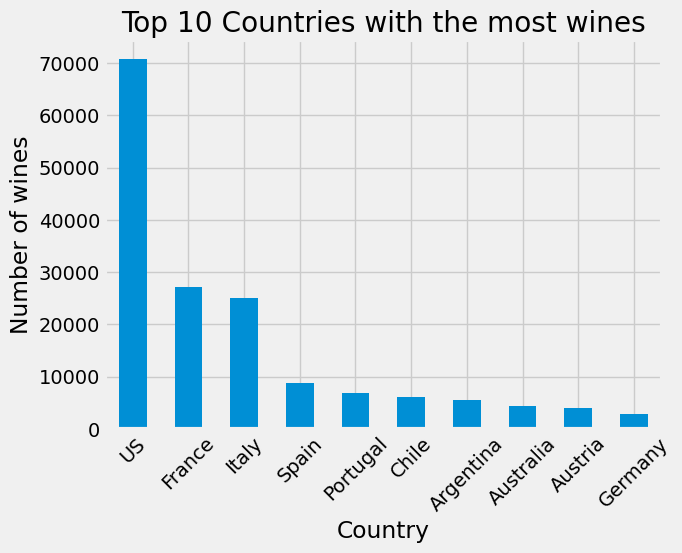

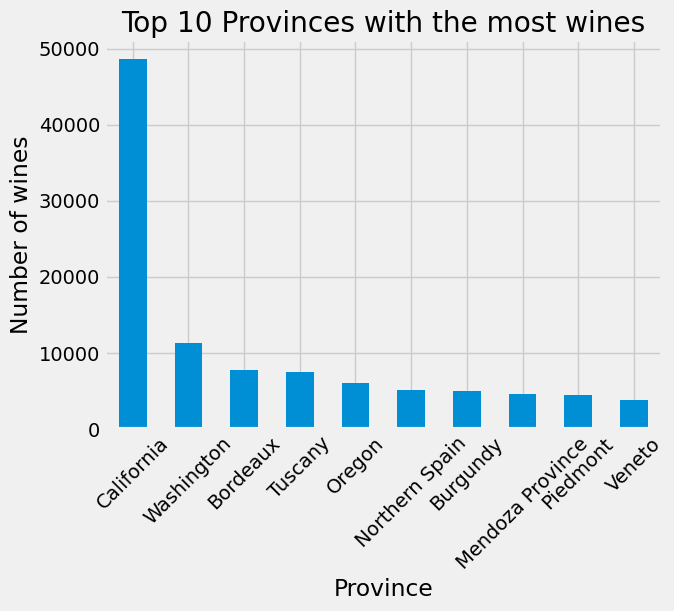

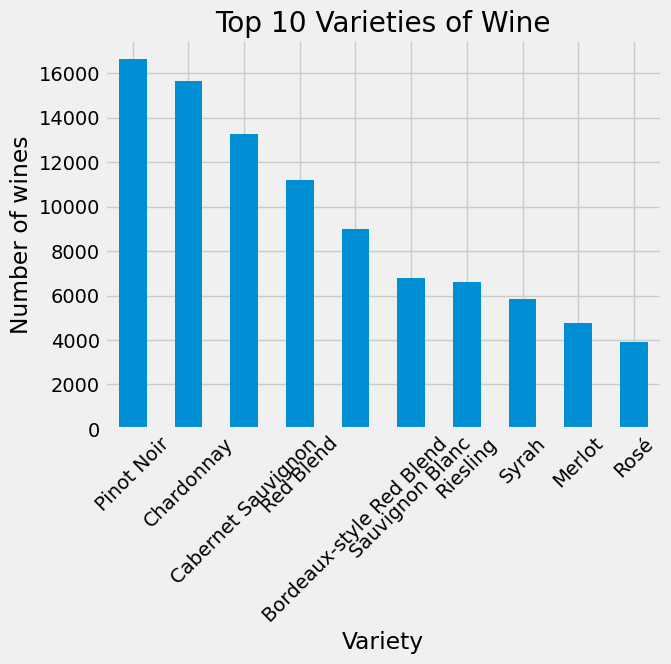

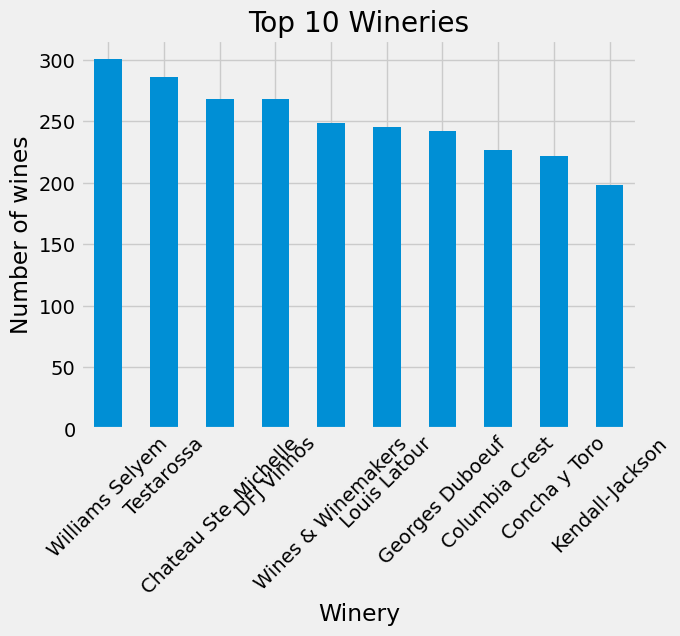

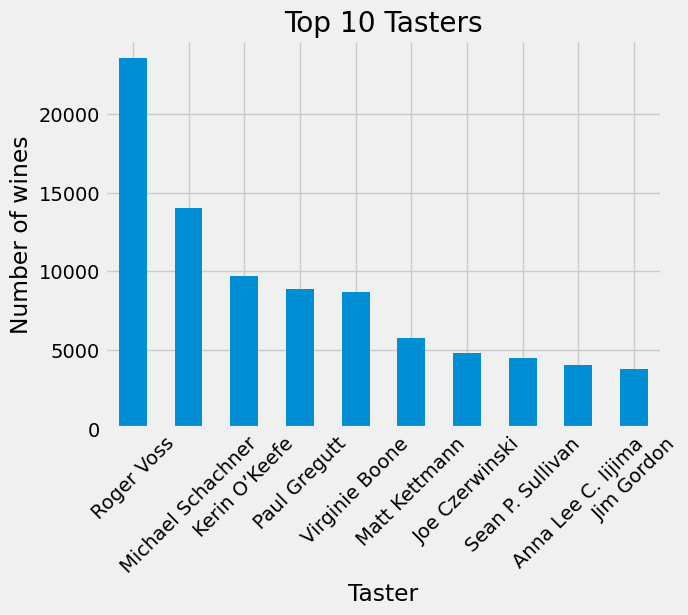

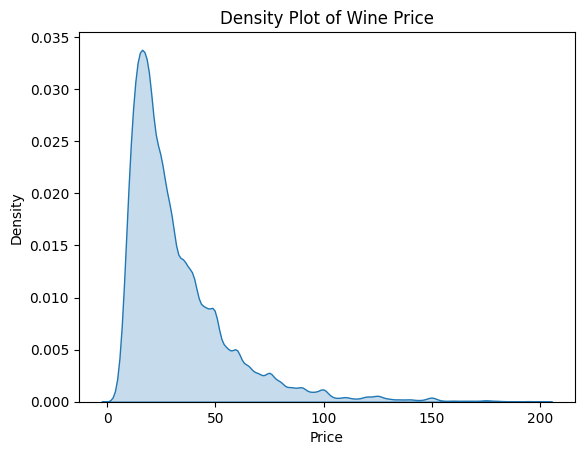

In [41]:
#plot the top 10 countries with the most wines
plt.style.use('fivethirtyeight')

country_count = wine_data['country'].value_counts().head(10)
country_count.plot(kind='bar')
plt.title('Top 10 Countries with the most wines')
#45 degree angle for x axis labels
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of wines')
plt.show()

#plot the top 10 provinces with the most wines
province_count = wine_data['province'].value_counts().head(10)
province_count.plot(kind='bar')
plt.title('Top 10 Provinces with the most wines')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.ylabel('Number of wines')
plt.show()

#plot the top 10 varieties of wine
variety_count = wine_data['variety'].value_counts().head(10)
variety_count.plot(kind='bar')
plt.title('Top 10 Varieties of Wine')
plt.xticks(rotation=45)
plt.xlabel('Variety')
plt.ylabel('Number of wines')
plt.show()

#plot the top 10 wineries
winery_count = wine_data['winery'].value_counts().head(10)
winery_count.plot(kind='bar')
plt.title('Top 10 Wineries')
plt.xticks(rotation=45)
plt.xlabel('Winery')
plt.ylabel('Number of wines')
plt.show()

#plot the top 10 tasters
taster_count = wine_data['taster_name'].value_counts().head(10)
taster_count.plot(kind='bar')
plt.title('Top 10 Tasters')
plt.xticks(rotation=45)
plt.xlabel('Taster')
plt.ylabel('Number of wines')
plt.show()

#plot price distribution
plt.style.use('default')
prices = wine_data['price']
prices_filtered = prices[prices < 200]
sns.kdeplot(data=prices_filtered, fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Wine Price')
plt.show()

In [15]:
#remove duplicate descriptions in the wine data
wine_data = wine_data.drop_duplicates(subset='description')
#split the data into training, validation, and testing
print(wine_data.shape)
training_data = wine_data.sample(frac=0.6, random_state=0)
print(wine_data.shape)
validation_data = wine_data.drop(training_data.index).sample(frac=0.5, random_state=0)
print(wine_data.shape)
testing_data = wine_data.drop(training_data.index).drop(validation_data.index)
print(wine_data.shape)

#save the data to csv files
training_data.to_csv('wine_training_data.csv')
validation_data.to_csv('wine_validation_data.csv')
testing_data.to_csv('wine_testing_data.csv')


(169430, 14)
(169430, 14)
(169430, 14)
(169430, 14)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samdisorbo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
